<a href="https://colab.research.google.com/github/anjaliharidevan-glitch/Internship/blob/main/MNIST_handwrittendata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Task**

* Load MNIST dataset (Hand written digits dataset)

* Train DNN and experiment with different number of layers and neurons.

* Now train the DNN with only two class from the dataset (A binary classifier using DNN)

* Apply Normalization to the image data and then train, and analyze the improvement.

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [15]:
hand_written = keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = hand_written.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_test.shape

(10000, 28, 28)

In [20]:
y_train.shape

(60000,)

In [21]:
y_test.shape

(10000,)

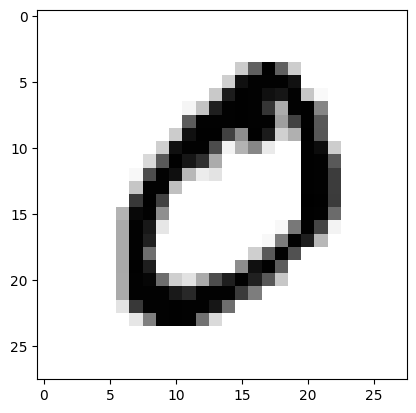

In [22]:
plt.imshow(x_train[1], cmap = 'binary')
plt.show()

In [23]:
y_train[1]

np.uint8(0)

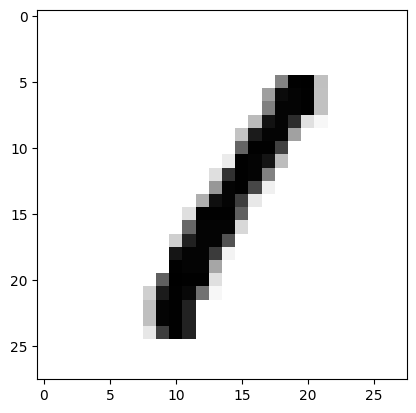

In [24]:
plt.imshow(x_train[3], cmap = 'binary')
plt.show()

In [25]:
y_train[3]

np.uint8(1)

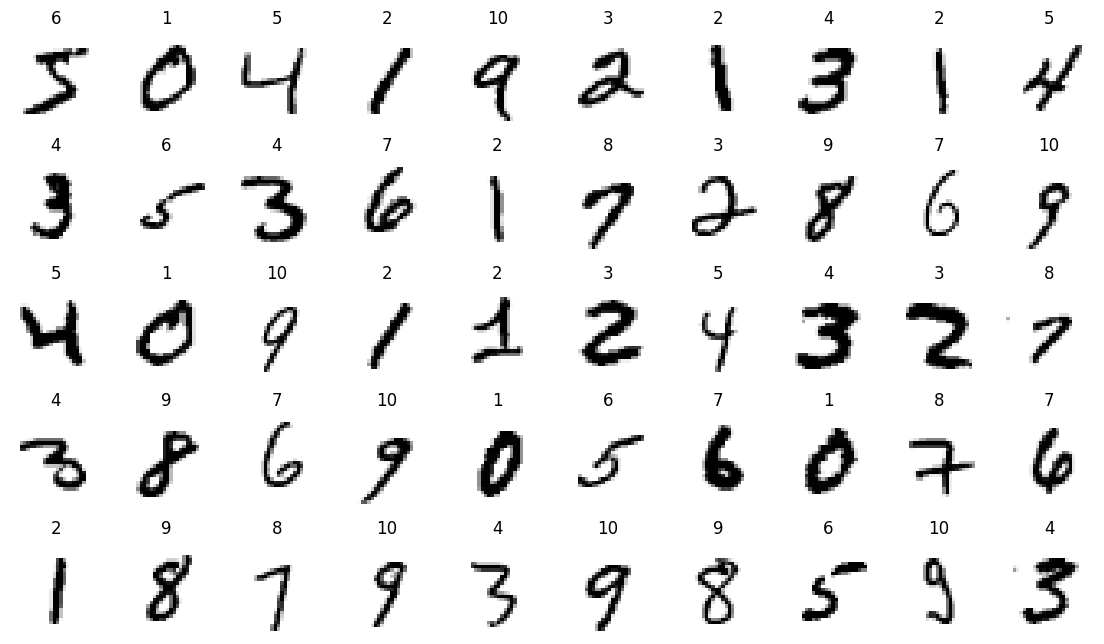

In [27]:
class_names = [1,2,3,4,5,6,7,8,9,10]

n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

In [28]:
ANN = keras.models.Sequential()
ANN.add(keras.layers.Flatten(input_shape = [28,28]))
ANN.add(keras.layers.Dense(100, activation = 'relu'))
ANN.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
ANN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [33]:
history_ANN = ANN.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7845 - loss: 8.3272 - val_accuracy: 0.8935 - val_loss: 0.4524
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8856 - loss: 0.4662 - val_accuracy: 0.9298 - val_loss: 0.2745
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9211 - loss: 0.2957 - val_accuracy: 0.9352 - val_loss: 0.2442
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9322 - loss: 0.2643 - val_accuracy: 0.9477 - val_loss: 0.1996
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9385 - loss: 0.2286 - val_accuracy: 0.9455 - val_loss: 0.2312
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9448 - loss: 0.2152 - val_accuracy: 0.9503 - val_loss: 0.2053
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9467 - loss: 0.2034 - val_accuracy: 0.9535 - val_loss: 0.2270
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9504 - loss: 0.1862 - 

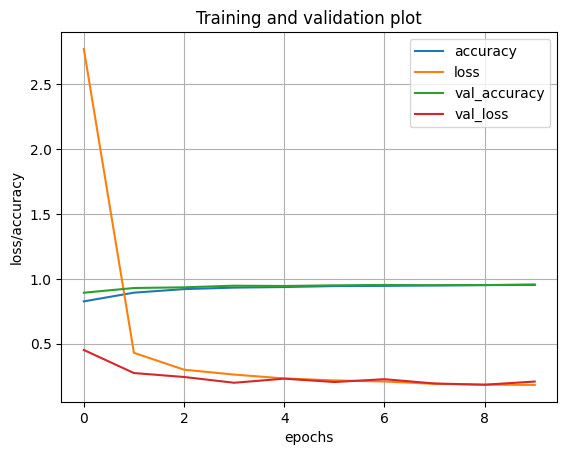

In [34]:
import pandas as pd
pd.DataFrame(history_ANN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [36]:
test_loss, test_accuracy = ANN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9392 - loss: 0.3330
Test loss: 0.2985697090625763, Test accuracy: 0.9470999836921692


In [37]:
DNN = keras.models.Sequential()     # initiate the model
DNN.add(keras.layers.Flatten(input_shape = [28,28]))   # define input layer
DNN.add(keras.layers.Dense(600, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(300, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(100, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(10, activation = 'softmax'))  # output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
DNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [44]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [46]:
history_DNN = DNN.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8333 - loss: 3.2627 - val_accuracy: 0.9352 - val_loss: 0.2244
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9396 - loss: 0.2226 - val_accuracy: 0.9600 - val_loss: 0.1703
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9521 - loss: 0.1763 - val_accuracy: 0.9677 - val_loss: 0.1292
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9634 - loss: 0.1317 - val_accuracy: 0.9620 - val_loss: 0.1566
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9675 - loss: 0.1203 - val_accuracy: 0.9710 - val_loss: 0.1045
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9720 - loss: 0.1032 - val_accuracy: 0.9717 - val_loss: 0.1140
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9752 - loss: 0.0934 - val_accuracy: 0.9735 - val_loss: 0.1356
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9791 -

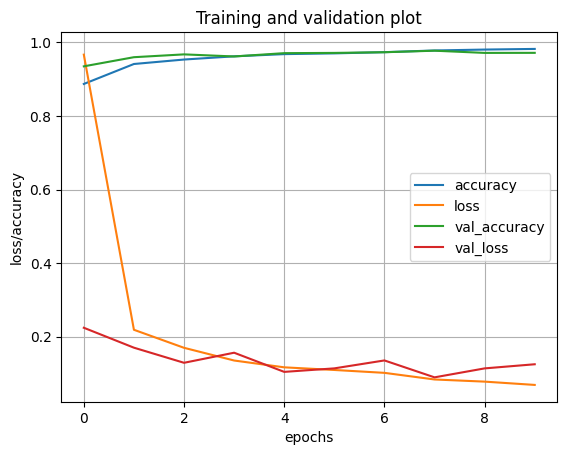

In [48]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [49]:
test_loss, test_accuracy = DNN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.1772
Test loss: 0.14300699532032013, Test accuracy: 0.9707000255584717


In [50]:
train_mask = (y_train == 0) | (y_train == 1)
x_train_binary = x_train[train_mask]
y_train_binary = y_train[train_mask]

test_mask = (y_test == 0) | (y_test == 1)
x_test_binary = x_test[test_mask]
y_test_binary = y_test[test_mask]

print("Original training data shape:", x_train.shape)
print("Filtered training data shape:", x_train_binary.shape)
print("Original testing data shape:", x_test.shape)
print("Filtered testing data shape:", x_test_binary.shape)

Original training data shape: (60000, 28, 28)
Filtered training data shape: (12665, 28, 28)
Original testing data shape: (10000, 28, 28)
Filtered testing data shape: (2115, 28, 28)


In [51]:
DNN_binary = keras.models.Sequential()
DNN_binary.add(keras.layers.Flatten(input_shape = [28,28]))
DNN_binary.add(keras.layers.Dense(600, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(300, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(100, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(1, activation = 'sigmoid')) # Output layer for binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
DNN_binary.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

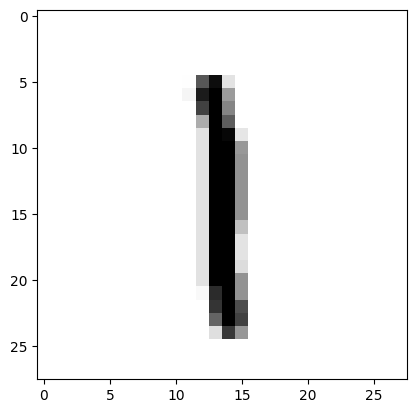

In [61]:
plt.imshow(x_train_binary[4],cmap='binary')
plt.show()

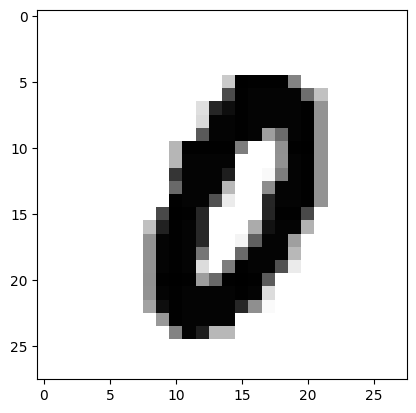

In [56]:
plt.imshow(x_train_binary[8],cmap='binary')
plt.show()


In [53]:
history_DNN_binary = DNN_binary.fit(x_train_binary, y_train_binary, epochs = 10, validation_split = 0.1)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9841 - loss: 0.9296 - val_accuracy: 1.0000 - val_loss: 5.7748e-11
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9989 - loss: 0.0340 - val_accuracy: 0.9992 - val_loss: 0.0845
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9969 - loss: 0.2954 - val_accuracy: 1.0000 - val_loss: 1.8537e-14
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9989 - loss: 0.0162 - val_accuracy: 1.0000 - val_loss: 7.3909e-16
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9998 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 1.2202e-16
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9995 - loss: 0.0050 - val_accuracy: 0.9992 - val_loss: 0.0059
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9993 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 1.6883e-18
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9989 - los

In [54]:
test_loss_binary, test_accuracy_binary = DNN_binary.evaluate(x_test_binary, y_test_binary)
print("Test loss for binary classifier: {}, Test accuracy for binary classifier: {}".format(test_loss_binary, test_accuracy_binary))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9999 - loss: 9.3069e-04
Test loss for binary classifier: 0.0035905763506889343, Test accuracy for binary classifier: 0.9995272159576416
